<div style="text-align: center;"><h1>Time Series analysis & forecasting </h1></div>
Prepared by: Nour Sfar


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_excel('datauk.xlsx')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Année                         63 non-null     datetime64[ns]
 1   Dépenses (% du PIB)           51 non-null     float64       
 2   Masse monétaire (% du PIB)    63 non-null     float64       
 3   Croissance du PIB (% annuel)  62 non-null     float64       
 4   Inflation, IPC (% annuel)     63 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.6 KB


In [9]:
df=data.dropna()

In [10]:
df.rename(columns = {'Dépenses (% du PIB)':'depenses','Masse monétaire (% du PIB)':'Mass_Mon','Croissance du PIB (% annuel)':'PIB','Inflation, IPC (% annuel)':'IPC'}, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 12 to 62
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Année     51 non-null     datetime64[ns]
 1   depenses  51 non-null     float64       
 2   Mass_Mon  51 non-null     float64       
 3   PIB       51 non-null     float64       
 4   IPC       51 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.4 KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
depenses,51.0,36.927618,3.928926,28.838079,34.507635,36.881620,38.010740,47.677124
Mass_Mon,51.0,91.185677,47.241943,30.453995,42.307287,84.960198,139.654479,165.625401
PIB,51.0,2.143492,2.897470,-10.359901,1.577274,2.531670,3.581643,8.674904
IPC,51.0,5.291625,5.227952,0.368047,2.025434,2.697495,7.266441,24.207288


# Visualiser les données

In [13]:
df.columns

Index(['Année', 'depenses', 'Mass_Mon', 'PIB', 'IPC'], dtype='object')

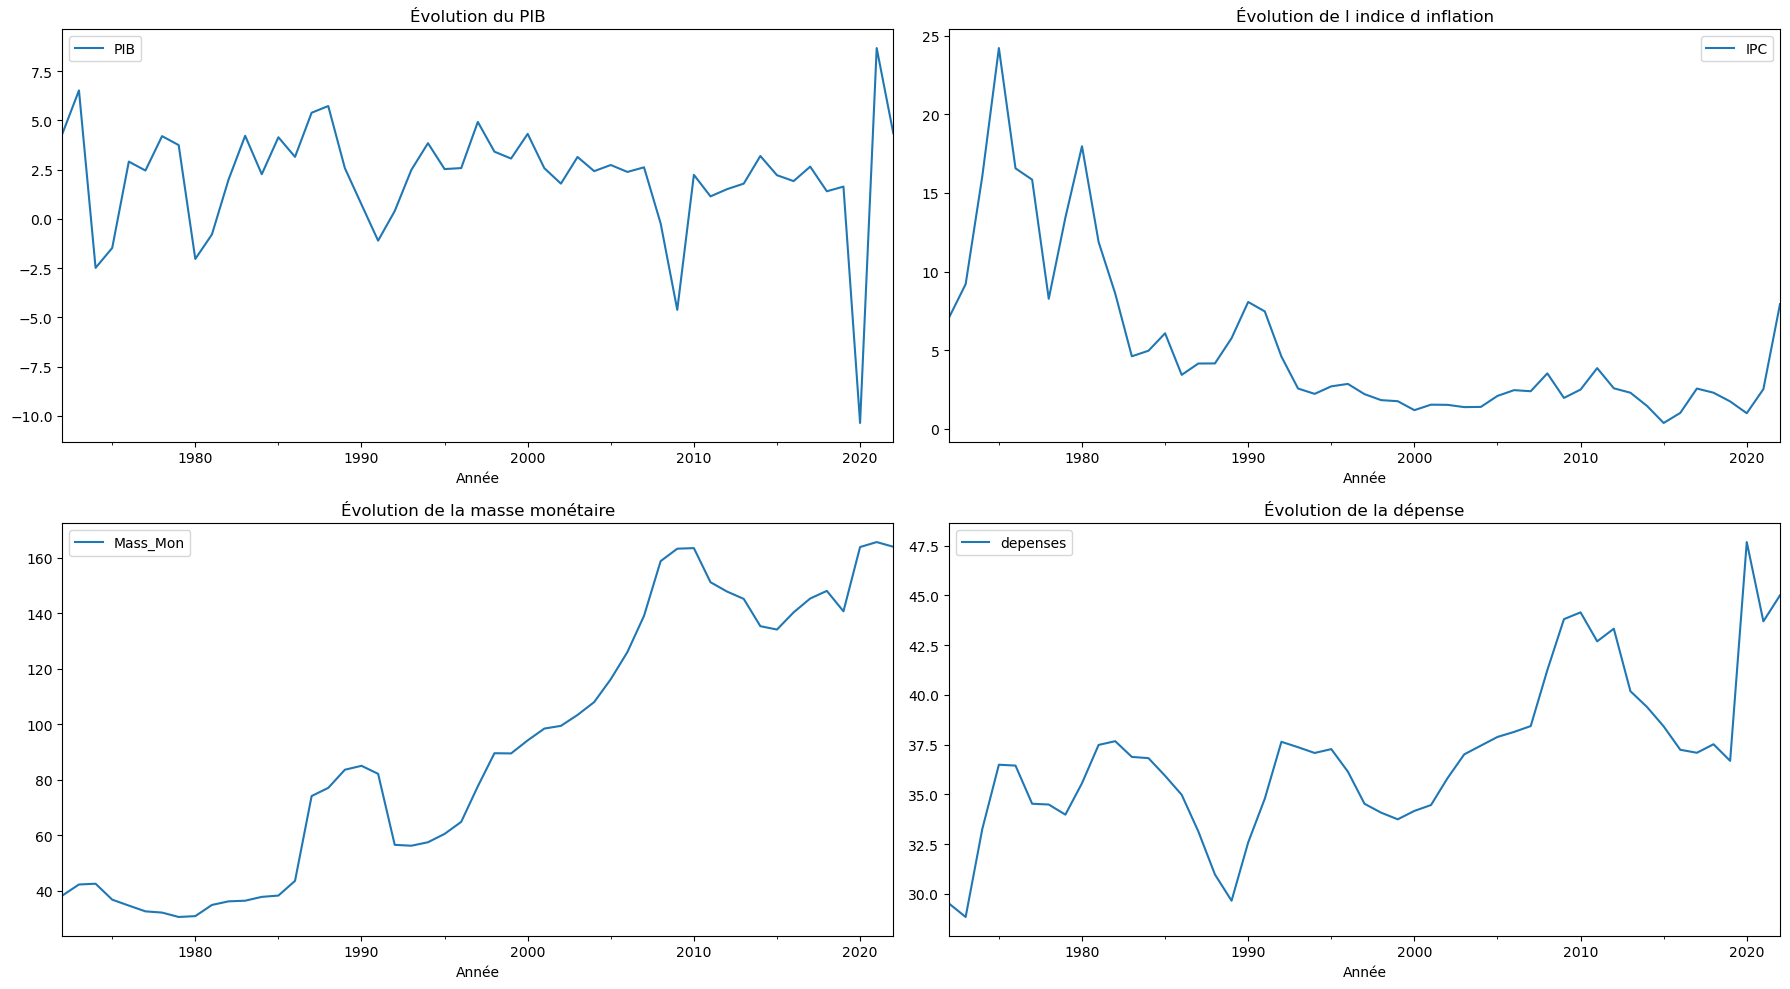

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

df.plot(x='Année', y='PIB', ax=axs[0, 0])
df.plot(x='Année', y='IPC', ax=axs[0, 1])
df.plot(x='Année', y='Mass_Mon', ax=axs[1, 0])
df.plot(x='Année', y='depenses', ax=axs[1, 1])

axs[0,0].set_title('Évolution du PIB')
axs[0,1].set_title('Évolution de l indice d inflation')
axs[1,0].set_title('Évolution de la masse monétaire')
axs[1,1].set_title('Évolution de la dépense')

plt.tight_layout()
plt.show()

In [15]:
df.set_index('Année', inplace=True)

# Stationnarité 

In [16]:
# Faire les tests de Dickey-Fuller augmenté
for column in df.columns:
    result = adfuller(df[column])
    print(f"\nResults for column {column}:")
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')


Results for column depenses:
ADF Statistic: -0.01788946499528467
p-value: 0.9570273974381989
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606

Results for column Mass_Mon:
ADF Statistic: -0.3034413347165586
p-value: 0.9250155201169266
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602

Results for column PIB:
ADF Statistic: -6.8423903498917245
p-value: 1.7775876148768182e-09
Critical Values:
	1%: -3.568
	5%: -2.921
	10%: -2.599

Results for column IPC:
ADF Statistic: -2.0482518404718397
p-value: 0.26582499942353527
Critical Values:
	1%: -3.589
	5%: -2.930
	10%: -2.603


Travaillons pour une seuil de confiance de 5%:

Sur la base des résultats fournis pour le test ADF (Augmented Dickey-Fuller) pour la colonne PIB :

- Statistique ADF : -6.8423903498917245
- valeur p : 1.7775876148768182e-09 (environ 0)

Les valeurs critique:
- Valeur critique à 5 % : -2.921


Interprétation :

1. Statistique ADF : La statistique ADF est -6.8423903498917245. Cette valeur est fortement négative.
2. Valeur p : La valeur p est approximativement 0, spécifiquement 1.7775876148768182e-09, ce qui est très proche de zéro.
Nous avons suffisamment de preuves pour conclure que la série du PIB est stationnaire.


Idem: on peut conclure que le reste des séries (depenses, Mass_Mon, IPC) sont non stationnaire.

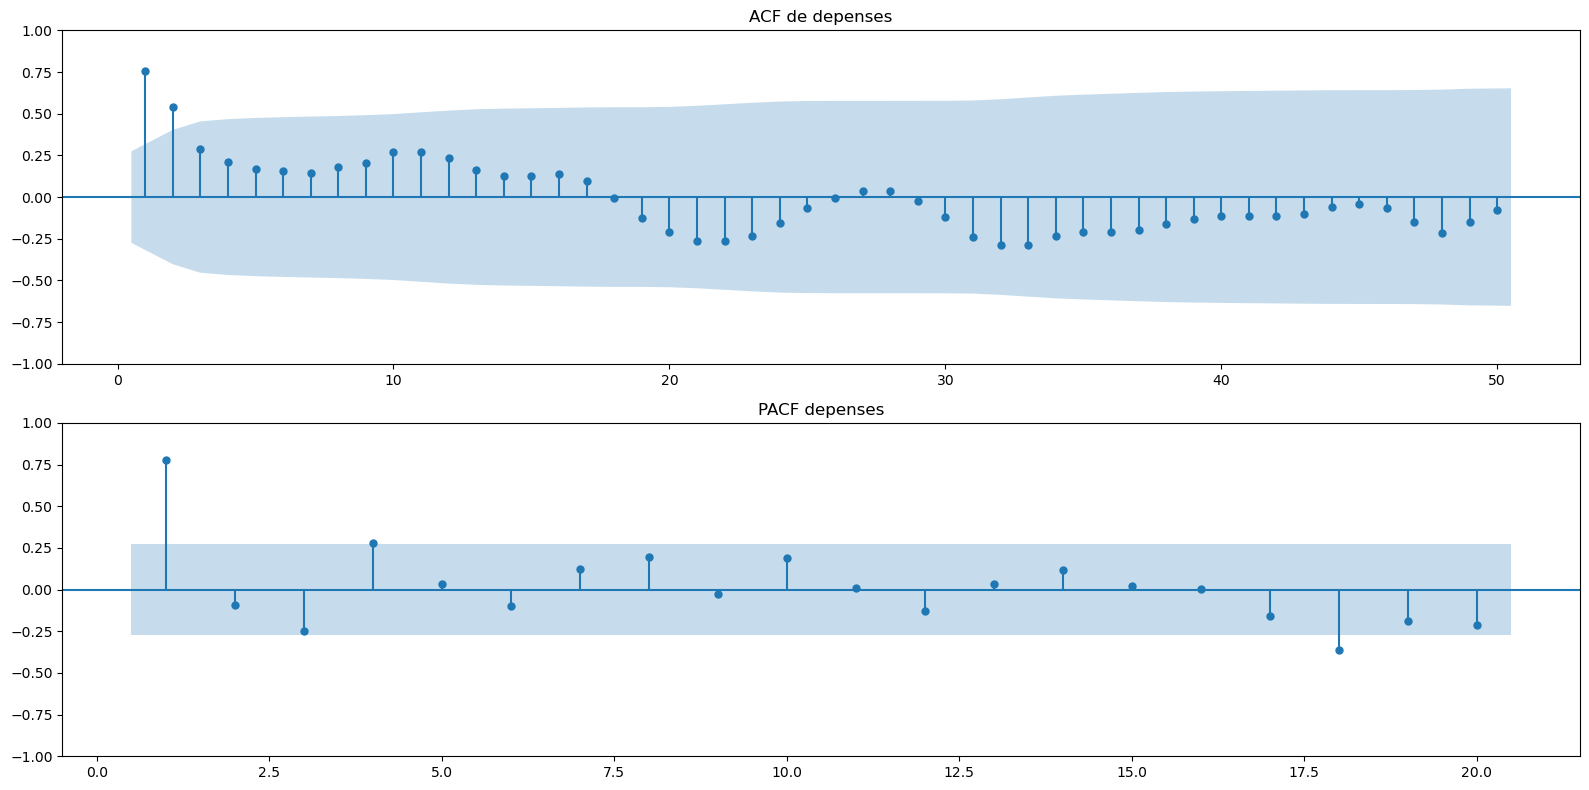

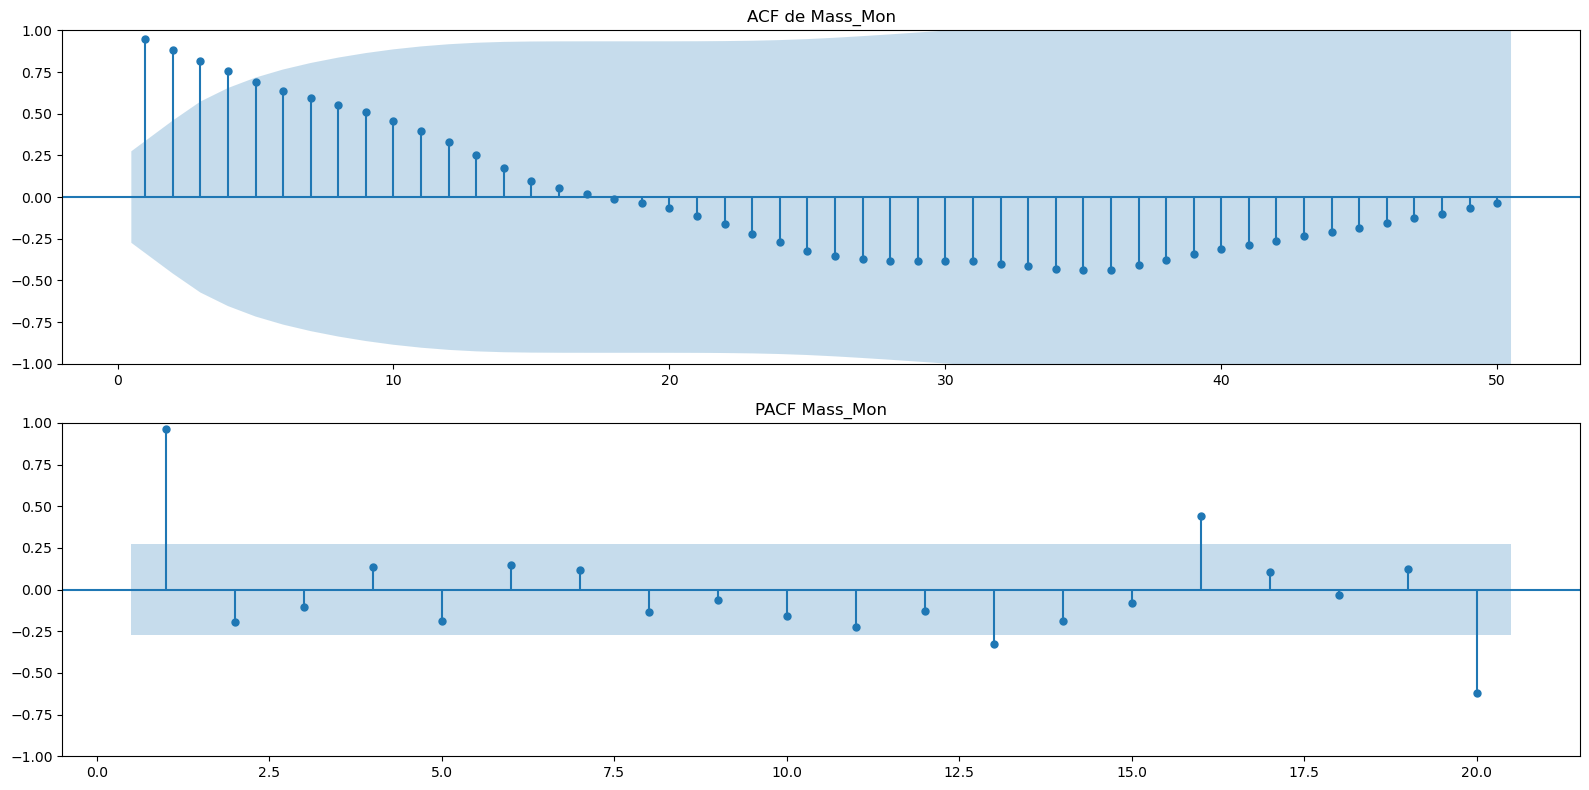

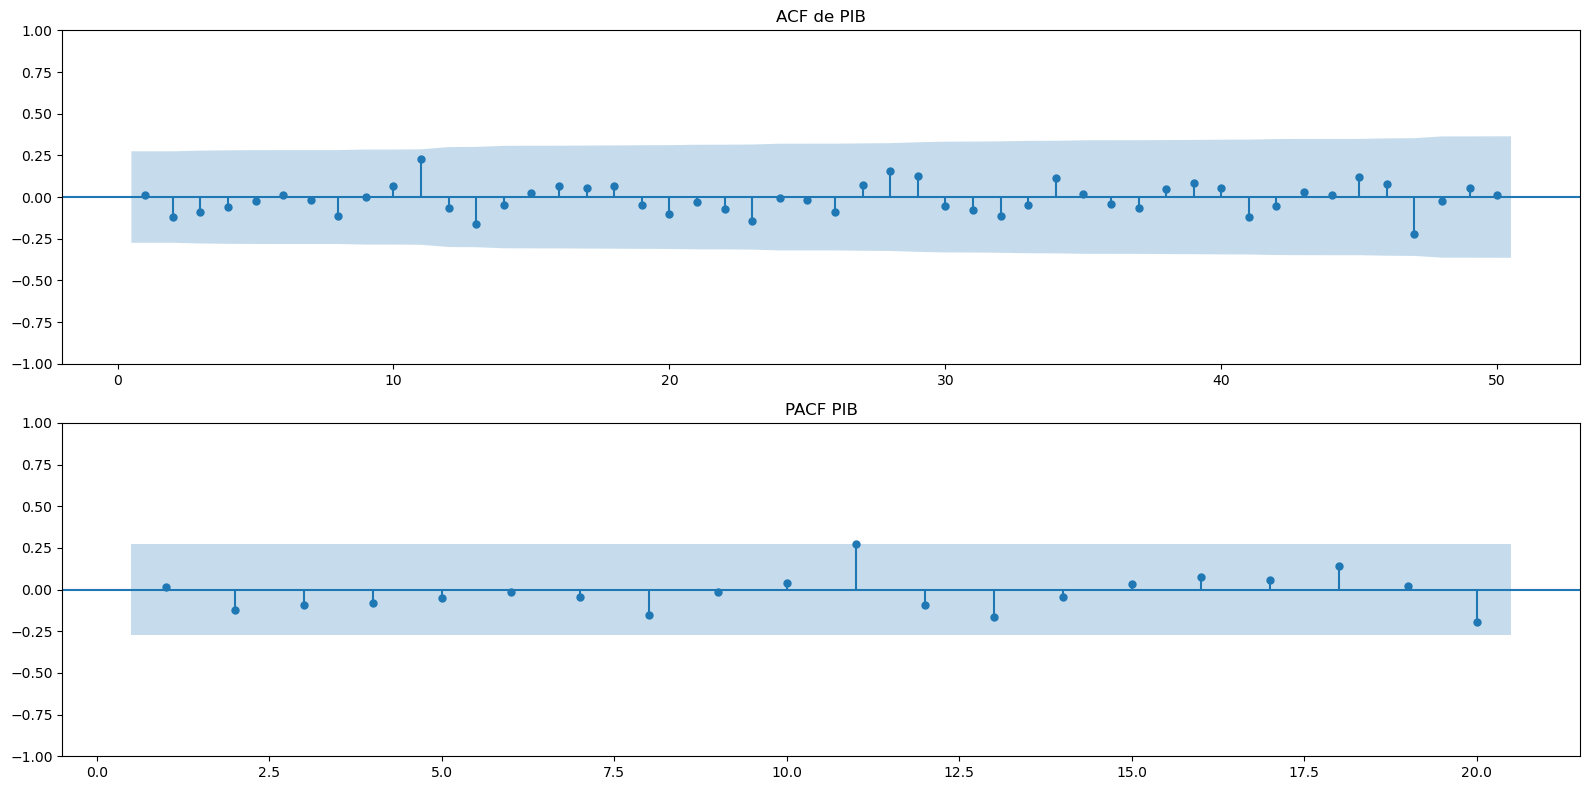

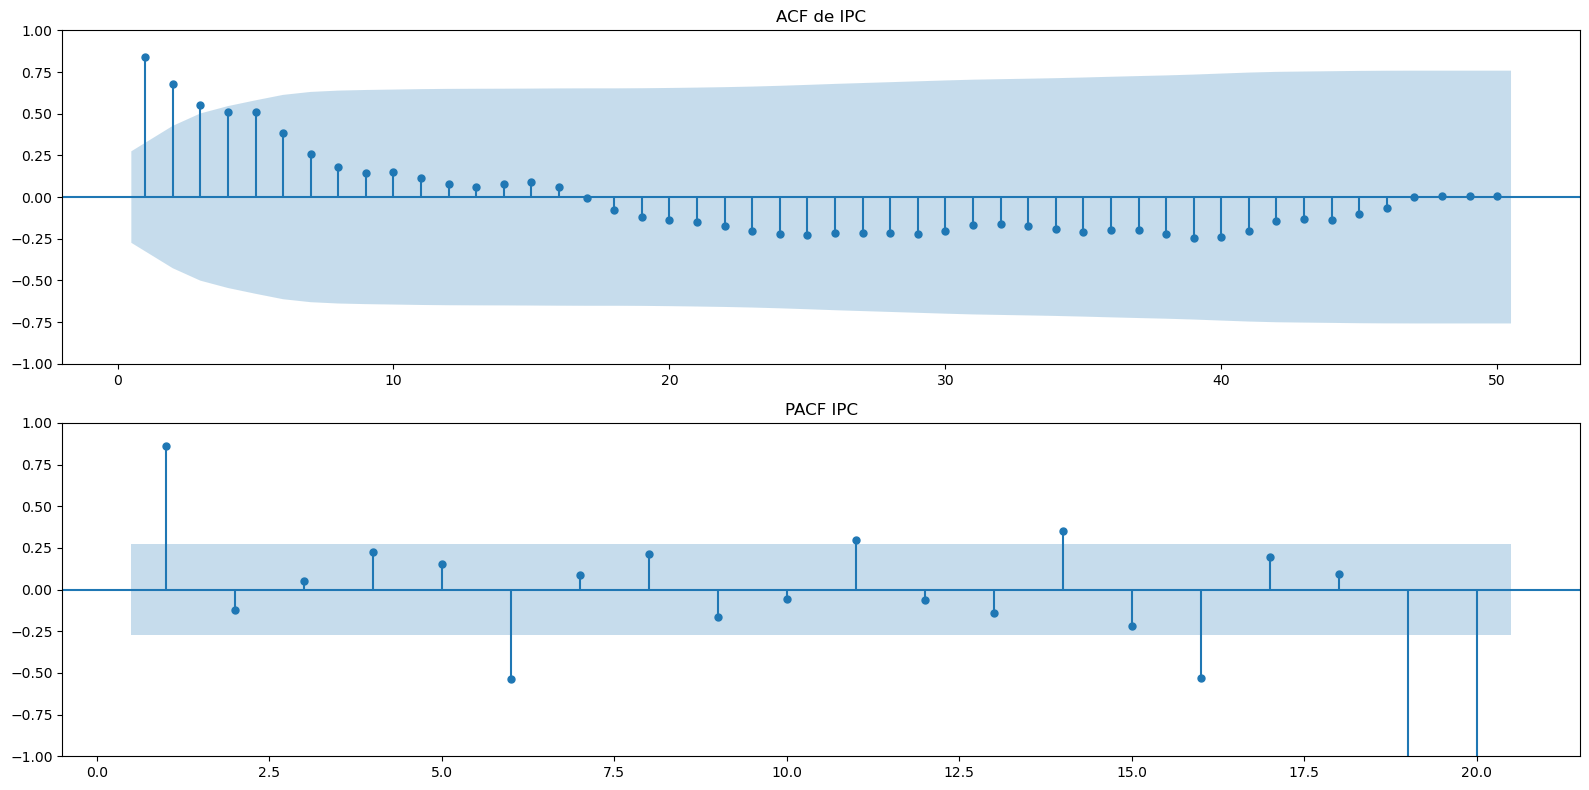

In [99]:
# Faire les graphiques ACF et PACF pour chaque colonne
for column in df.columns:
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,8))
    plot_acf(df[column], lags=50, zero=False, ax=ax1)
    ax1.set_title(f"ACF de {column}")
    plot_pacf(df[column], lags=20, zero=False, ax=ax2)
    ax2.set_title(f"PACF {column}")
    plt.tight_layout()
    plt.show()

# Transformation pour rendre la série stationnaire

In [100]:
dff=df[['depenses','Mass_Mon','IPC']]

In [101]:
# Différencier les séries de données et les ajouter au DataFrame
df_diff = dff.diff().dropna()
df_diff.columns = [f"{col}_diff" for col in dff.columns]
df = pd.concat([df, df_diff], axis=1)
df.head()

,depenses,Mass_Mon,PIB,IPC,depenses_diff,Mass_Mon_diff,IPC_diff
Année,,,,,,,
1972-01-01,29.511858,38.185852,4.321668,7.071098,NaN,NaN,NaN
1973-01-01,28.838079,42.169886,6.523848,9.196033,-0.673779,3.984033,2.124935
1974-01-01,33.253575,42.444689,-2.484404,16.044011,4.415496,0.274803,6.847978
1975-01-01,36.489009,36.697659,-1.473649,24.207288,3.235434,-5.747030,8.163276
1976-01-01,36.444959,34.562379,2.910266,16.559523,-0.044050,-2.135280,-7.647765


In [102]:
df=df.dropna()
df.head()

,depenses,Mass_Mon,PIB,IPC,depenses_diff,Mass_Mon_diff,IPC_diff
Année,,,,,,,
1973-01-01,28.838079,42.169886,6.523848,9.196033,-0.673779,3.984033,2.124935
1974-01-01,33.253575,42.444689,-2.484404,16.044011,4.415496,0.274803,6.847978
1975-01-01,36.489009,36.697659,-1.473649,24.207288,3.235434,-5.747030,8.163276
1976-01-01,36.444959,34.562379,2.910266,16.559523,-0.044050,-2.135280,-7.647765
1977-01-01,34.528167,32.479976,2.457751,15.840267,-1.916793,-2.082404,-0.719256


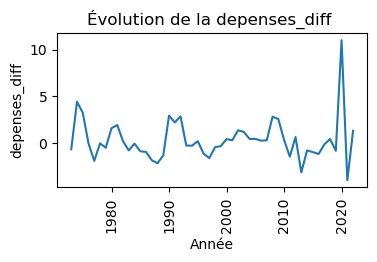

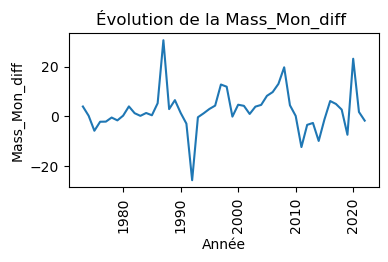

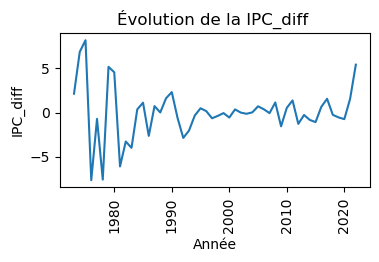

In [103]:
for i in df_diff.columns:
    plt.figure(figsize=(4,2))
    sns.lineplot(y=df[i],x = df.index,linewidth = 1.5)
    plt.xlabel ('Année')
    plt.ylabel (i)
    plt.title('Évolution de la {} '.format(i))
    plt.xticks(rotation=90)
    plt.show()

In [104]:
# Faire les tests de Dickey-Fuller augmenté pour les séries différenciées
for column in df_diff.columns:
    result = adfuller(df[column])
    print(f"\nResults for column {column}:")
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')


Results for column depenses_diff:
ADF Statistic: -4.167977524602791
p-value: 0.0007461448757894758
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606

Results for column Mass_Mon_diff:
ADF Statistic: -4.583590916426238
p-value: 0.0001384703714606517
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602

Results for column IPC_diff:
ADF Statistic: -1.3855675908734404
p-value: 0.5891753067726766
Critical Values:
	1%: -3.589
	5%: -2.930
	10%: -2.603


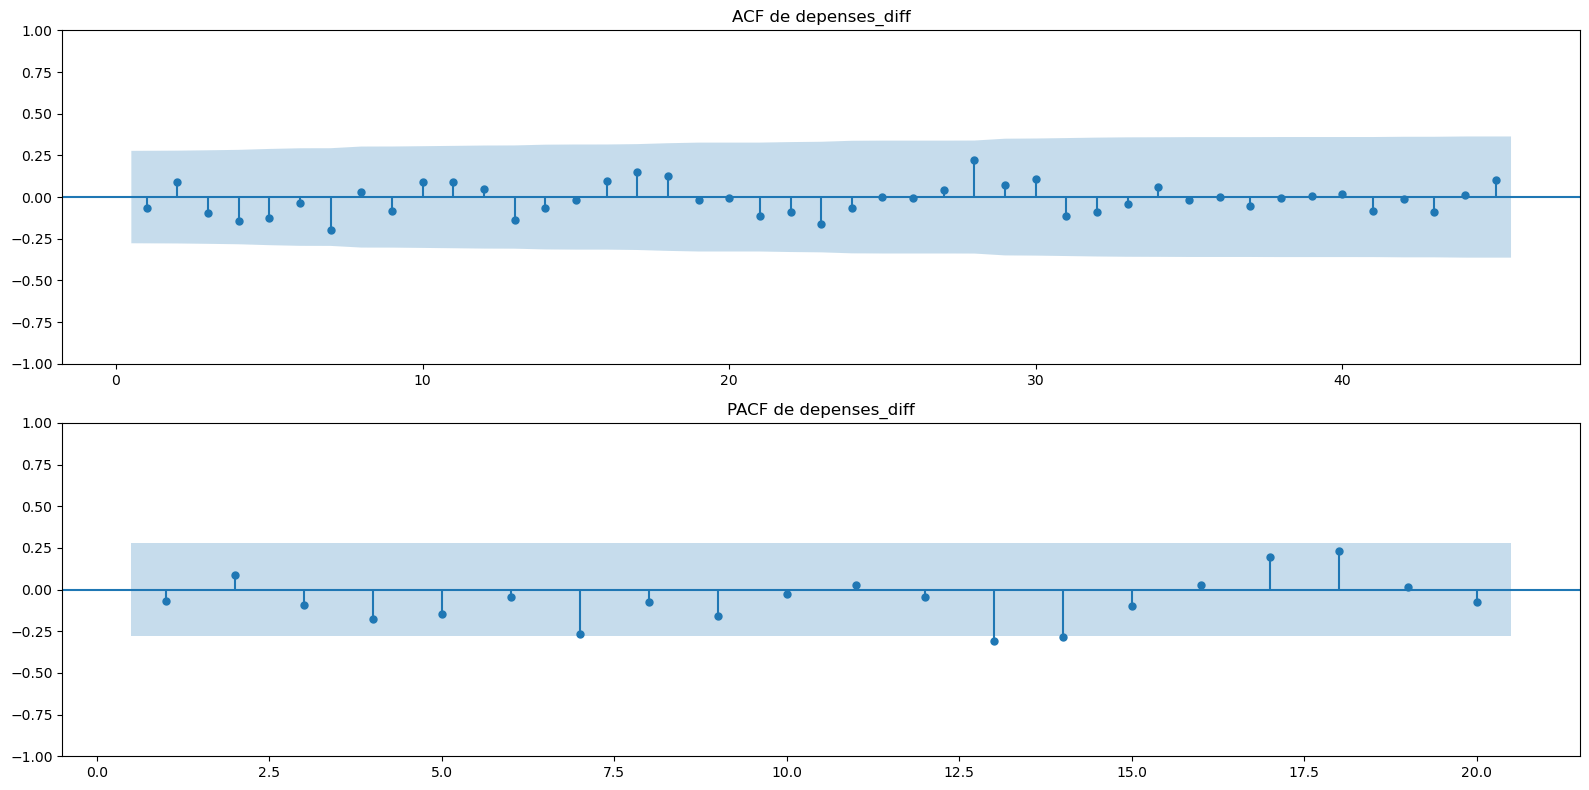

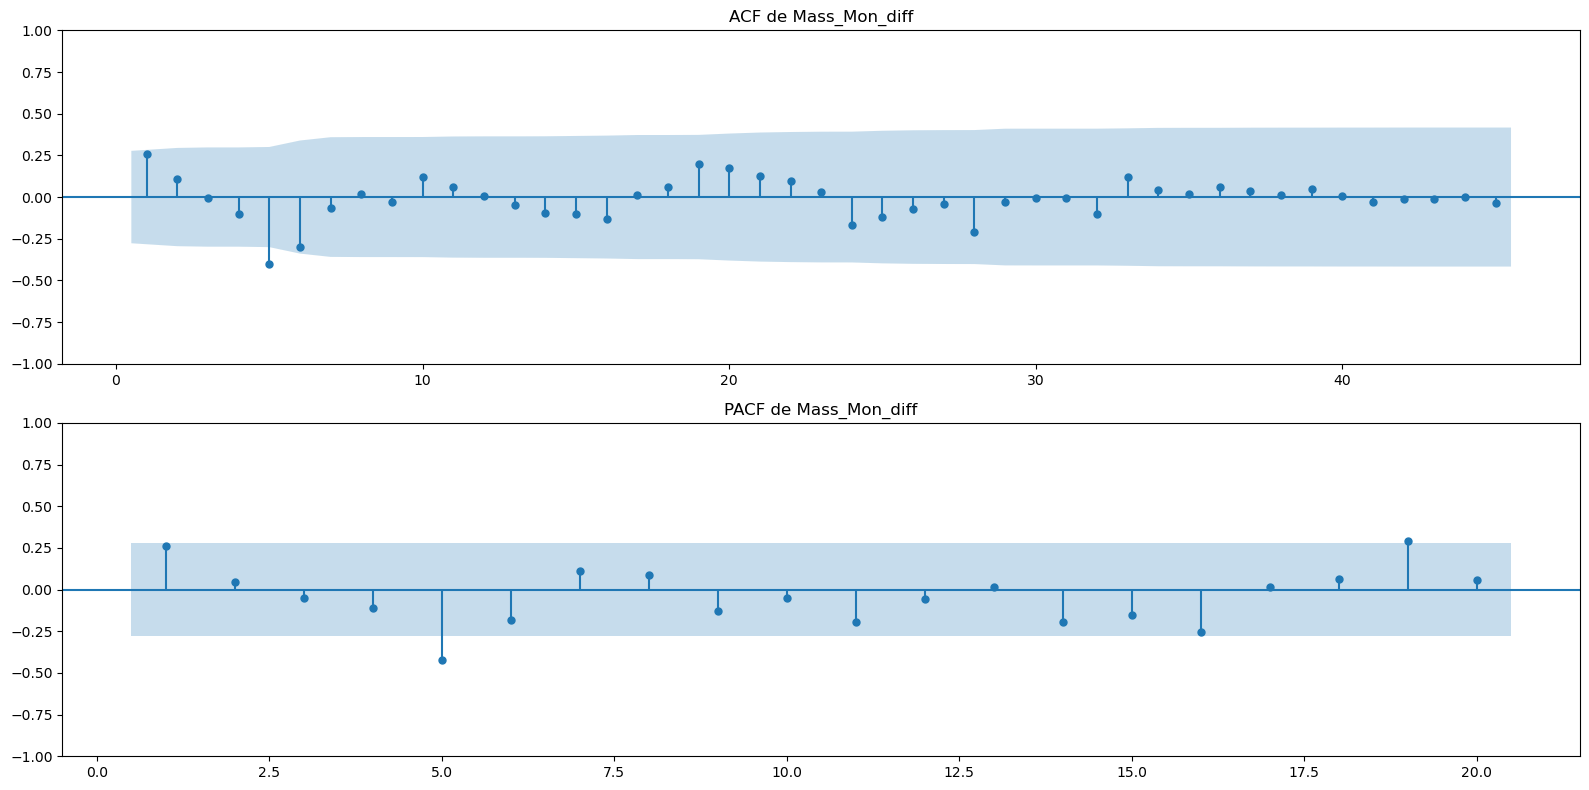

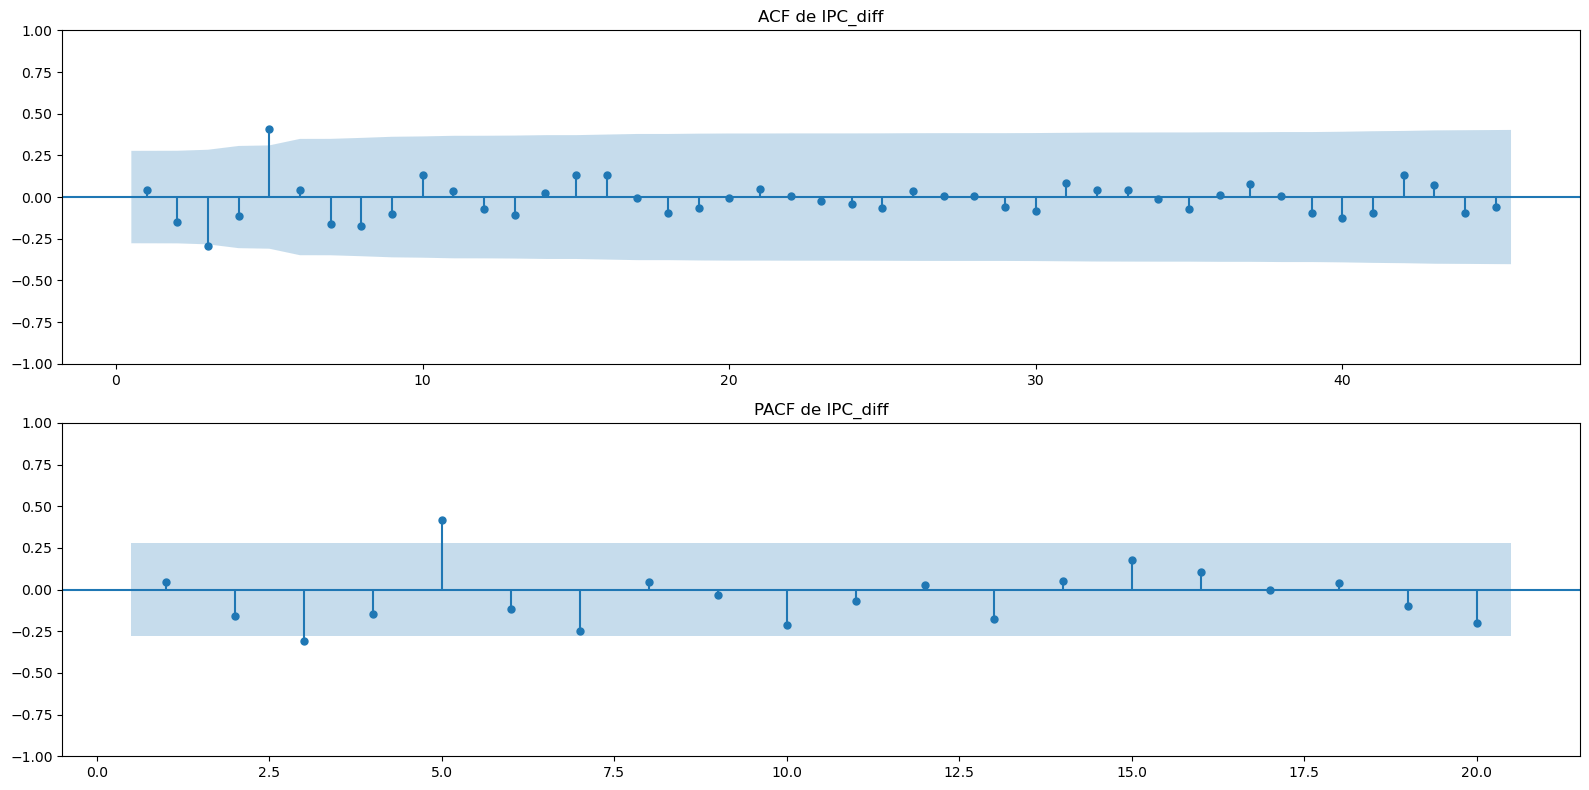

In [105]:
# Faire les graphiques ACF et PACF pour chaque colonne différenciée
for column in df_diff.columns:
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,8))
    plot_acf(df[column], lags=45, zero=False, ax=ax1)
    ax1.set_title(f"ACF de {column}")
    plot_pacf(df[column], lags=20, zero=False, ax=ax2)
    ax2.set_title(f"PACF de {column}")
    plt.tight_layout()
    plt.show()

# Saisonabilité

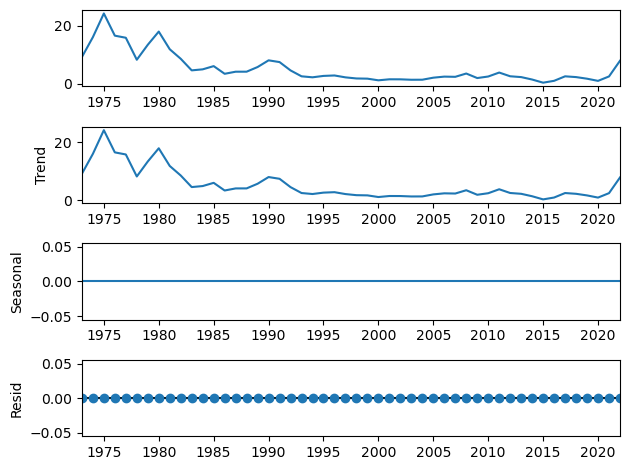

In [106]:
analysis = df[['IPC']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

# Division de la base en train et en base test

In [121]:
dfd= pd.concat([df['PIB'], df_diff], axis=1).dropna()
dfd.head()

,PIB,depenses_diff,Mass_Mon_diff,IPC_diff
Année,,,,
1973-01-01,6.523848,-0.673779,3.984033,2.124935
1974-01-01,-2.484404,4.415496,0.274803,6.847978
1975-01-01,-1.473649,3.235434,-5.747030,8.163276
1976-01-01,2.910266,-0.044050,-2.135280,-7.647765
1977-01-01,2.457751,-1.916793,-2.082404,-0.719256


In [123]:
# Définir le point de division
split_point = int(len(dfd) * 0.9)  # 90% des données pour l'entraînement

# Diviser les données
df_train = dfd.iloc[:split_point]
df_test = dfd.iloc[split_point:]

# Vérifier les tailles des ensembles d'entraînement et de test
print('Training set:', len(df_train))
print('Test set:', len(df_test))

Training set: 45
Test set: 5


In [128]:
# Choisir l'ordre optimal du modèle VAR
model = VAR(df_train)

# Choisir l'ordre optimal p pour le modèle VAR
order_selection = model.select_order(maxlags=5)
order_selection.summary()

,AIC,BIC,FPE,HQIC
0,7.432,7.601*,1689.,7.493
1,7.130,7.975,1256.,7.436*
2,7.350,8.870,1606.,7.900
3,7.221,9.417,1509.,8.015
4,7.284,10.15,1833.,8.322
5,6.303*,9.849,869.9*,7.585


In [129]:
# L'ordre optimal est donné par le critère d'information d'Akaike (AIC) ou le critère d'information bayésien (BIC) 
optimal_order_aic = order_selection.aic
optimal_order_bic = order_selection.bic
optimal_order_fpe = order_selection.fpe
optimal_order_hqic = order_selection.hqic

print(f"P optimal avec AIC: {optimal_order_aic}")
print(f"P optimal avec BIC: {optimal_order_bic}")
print(f"P optimal avec FPE: {optimal_order_fpe}")
print(f"P optimal avec HQIC: {optimal_order_hqic}")

P optimal avec AIC: 5
P optimal avec BIC: 0
P optimal avec FPE: 5
P optimal avec HQIC: 1


# Estimation du modèle

In [130]:
# Créer le modèle VAR
model = VAR(df_train)

# Choisir un ordre 5
results = model.fit(5)

# Voir un sommaire des résultats
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 18, Apr, 2024
Time:                     00:50:47
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    9.84930
Nobs:                     40.0000    HQIC:                   7.58501
Log likelihood:          -269.083    FPE:                    869.916
AIC:                      6.30266    Det(Omega_mle):         160.841
--------------------------------------------------------------------
Results for equation PIB
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   -0.109529         1.121097           -0.098           0.922
L1.PIB                  -0.006526         0.265196           -0.025           0.980
L1.depenses_diff        -0.984657         0.352963

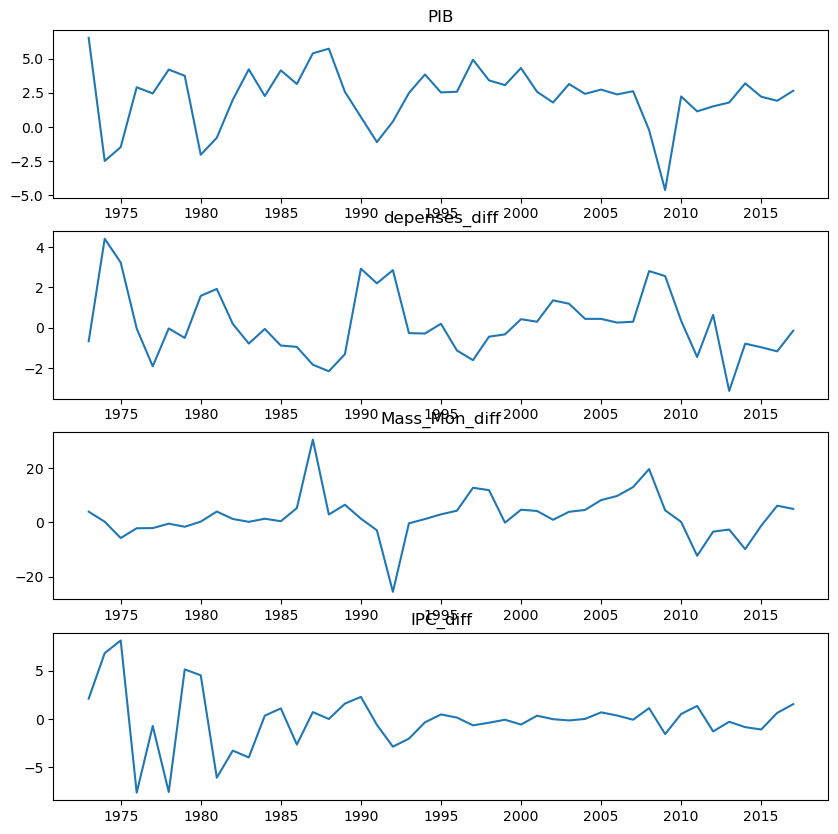

In [135]:
results.plot()
plt.show()

# Validation du modèle 

In [136]:
# Obtenir les résidus
residuals = results.resid
residuals.head()

,PIB,depenses_diff,Mass_Mon_diff,IPC_diff
Année,,,,
1978-01-01,-0.607868,0.114010,0.425423,-2.222838
1979-01-01,-0.177103,-0.028790,-2.181848,0.215909
1980-01-01,-1.006621,-0.074270,3.638977,-0.319160
1981-01-01,-0.778222,0.152255,-1.342012,-1.756115
1982-01-01,-1.532983,1.360965,-4.830124,-1.539489


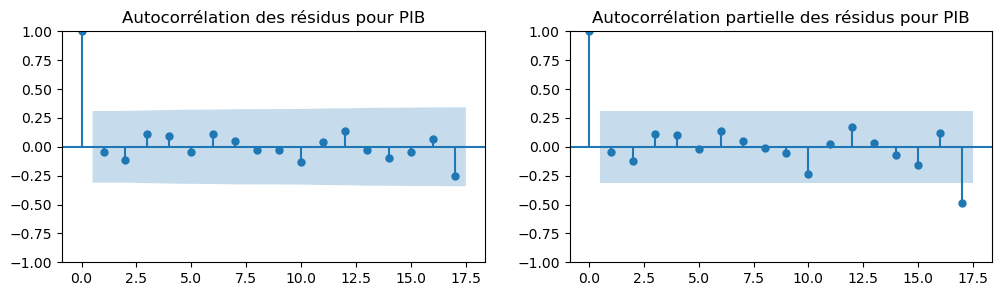

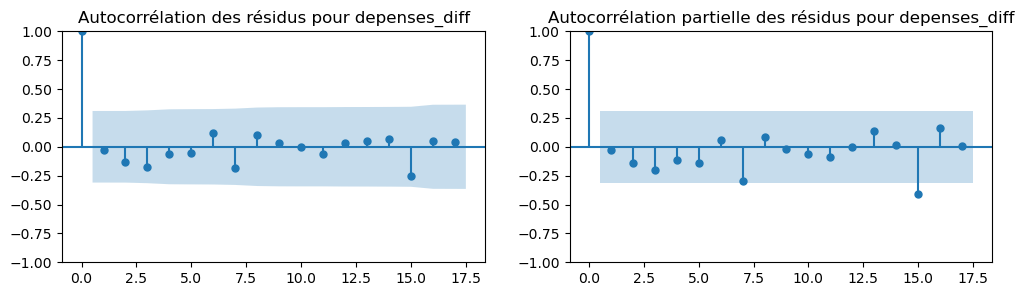

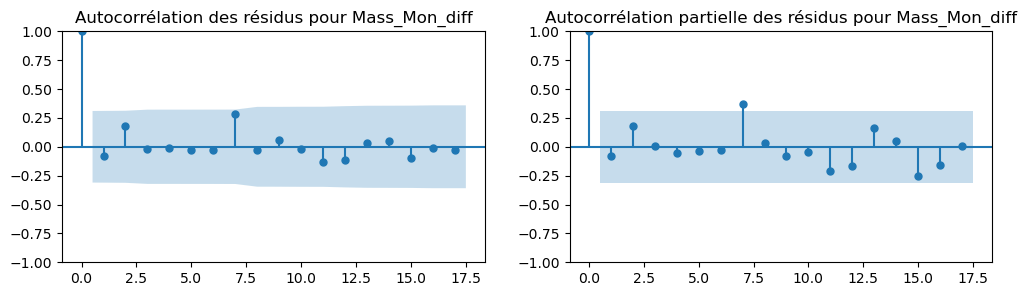

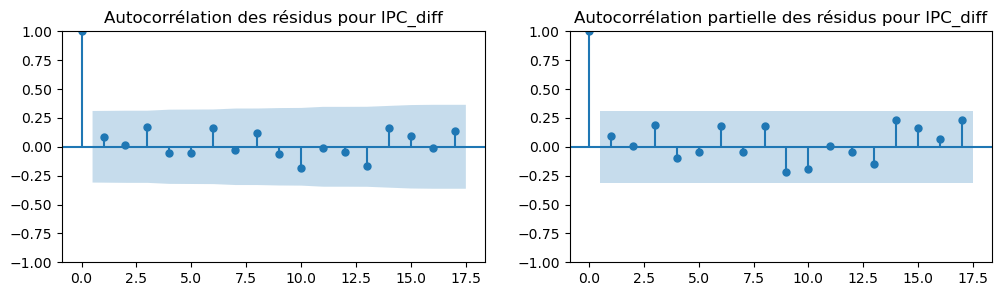

In [137]:
# Tracer l'ACF et le PACF pour chaque série de résidus
for col in residuals.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))
    
    plot_acf(residuals[col], ax=axes[0])
    axes[0].set_title(f'Autocorrélation des résidus pour {col}')
    
    plot_pacf(residuals[col], ax=axes[1])
    axes[1].set_title(f'Autocorrélation partielle des résidus pour {col}')

plt.show()

In [138]:
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.diagnostic import acorr_ljungbox
# Effectuer des tests sur les résidus
for col in residuals.columns:
    print(f"Résidus pour {col}:")
    jb_test = jarque_bera(residuals[col])
    print(f"Test de Jarque-Bera: statistic={jb_test[0]}, p-value={jb_test[1]}")

Résidus pour PIB:
Test de Jarque-Bera: statistic=1.9059317485845881, p-value=0.3855956974812551
Résidus pour depenses_diff:
Test de Jarque-Bera: statistic=2.1044742399081877, p-value=0.3491557714050238
Résidus pour Mass_Mon_diff:
Test de Jarque-Bera: statistic=1.7449668760734254, p-value=0.41791239990028173
Résidus pour IPC_diff:
Test de Jarque-Bera: statistic=2.7136207894529063, p-value=0.2574807304901465


In [139]:
# Préparer un tableau pour stocker les résultats
results_df = pd.DataFrame(columns=['Variable', 'Lag', 'LB Statistic', 'LB P-value'])

# Effectuer le test de Ljung-Box pour des décalages de 1 à 12
for col in residuals.columns:
    for lag in range(1, 13):
        lb_test = acorr_ljungbox(residuals[col], lags=[lag], return_df=True)
        results_df = results_df.append({
            'Variable': col,
            'Lag': lag,
            'LB Statistic': lb_test['lb_stat'].values[0],
            'LB P-value': lb_test['lb_pvalue'].values[0]
        }, ignore_index=True)

# Afficher les résultats
print(results_df)

         Variable Lag  LB Statistic  LB P-value
0             PIB   1      0.096761    0.755751
1             PIB   2      0.709175    0.701463
2             PIB   3      1.264977    0.737466
3             PIB   4      1.698864    0.790924
4             PIB   5      1.812667    0.874411
5             PIB   6      2.372771    0.882426
6             PIB   7      2.511812    0.926205
7             PIB   8      2.561811    0.958786
8             PIB   9      2.616649    0.977580
9             PIB  10      3.540358    0.965710
10            PIB  11      3.623642    0.979663
11            PIB  12      4.690470    0.967527
12  depenses_diff   1      0.036890    0.847690
13  depenses_diff   2      0.784358    0.675583
14  depenses_diff   3      2.166080    0.538660
15  depenses_diff   4      2.358316    0.670173
16  depenses_diff   5      2.506311    0.775544
17  depenses_diff   6      3.162226    0.788228
18  depenses_diff   7      4.813343    0.682730
19  depenses_diff   8      5.326830    0

# Prédiction train et test

In [140]:
# Prévoir les valeurs sur l'ensemble d'entraînement
# Prédictions sur les ensembles d'entraînement et de test
train_pred = results.fittedvalues
test_pred = results.forecast(df_train.values, steps=len(df_test))

In [142]:
forecast = results.forecast(df_train.values, len(df_test))

In [160]:
#train_rmse = rmse(df_train, train_pred)

In [143]:
forecast

array([[-0.30418627, -0.73044023, -5.73882813, -2.13858285],
       [ 3.10057656, -0.17420198,  5.99134857, -1.62824441],
       [ 2.59773517, -1.27797102, -1.46818597, -0.30837701],
       [ 1.88939742,  0.01138868, -6.32393935, -0.5876255 ],
       [ 2.40642024, -0.64119103, -1.14970416, -0.38906814]])

In [145]:
# Créer un DataFrame avec les prédictions
train_pred_df = pd.DataFrame(train_pred, columns=df_train.columns)
#train_pred_df['Année'] = df_diff.index[4:len(df_train)]  # Ajouter les dates correspondant à l'ensemble d'entraînement
#train_pred_df.set_index('Année', inplace=True)  # Utiliser les dates comme indices

test_pred_df = pd.DataFrame(test_pred, columns=df_train.columns)
#test_pred_df['Année'] = df_diff.index[len(df_train):]  # Ajouter les dates correspondant à l'ensemble d'entraînement
#test_pred_df.set_index('Année', inplace=True)  # Utiliser les dates comme indices

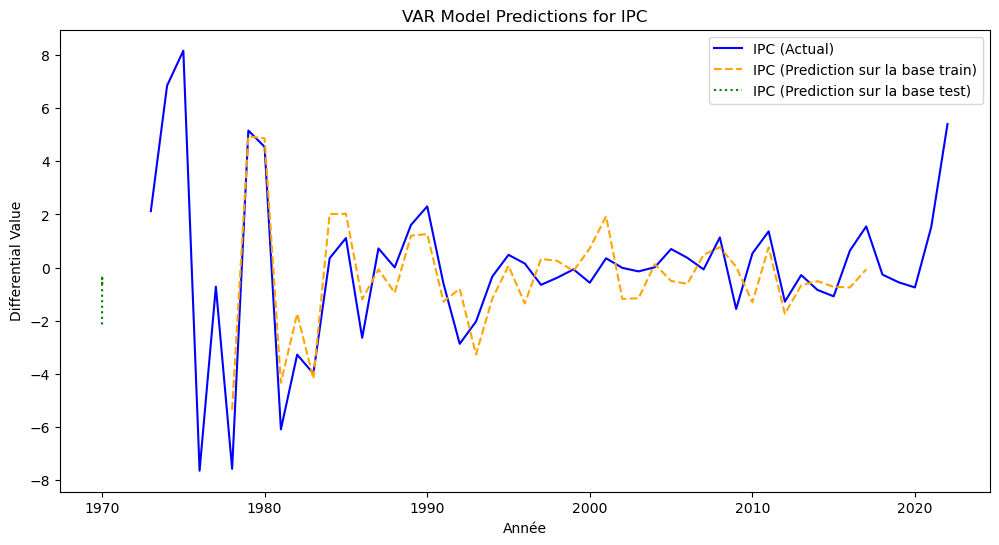

In [149]:
plt.figure(figsize=(12, 6))
plt.plot(df_diff.index, df_diff['IPC_diff'], label='IPC (Actual)', color='blue')
plt.plot(train_pred_df.index, train_pred_df['IPC_diff'], label='IPC (Prediction sur la base train)', linestyle='dashed', color='orange')
plt.plot(test_pred_df.index, test_pred_df['IPC_diff'], label='IPC (Prediction sur la base test)', linestyle='dotted', color='green')
plt.xlabel('Année')
plt.ylabel('Differential Value')
plt.title('VAR Model Predictions for IPC')
plt.legend()
plt.show()

In [151]:
cols = ['PIB', 'depenses_diff', 'Mass_Mon_diff', 'IPC_diff']
forc = pd.DataFrame(forecast, index = df_test.index, columns = cols)
cols2 = forc.columns

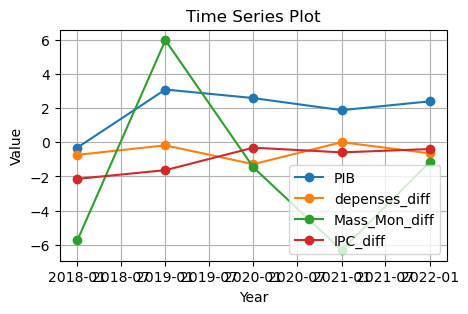

In [152]:
plt.figure(figsize=(5, 3))
for column in forc.columns:
    plt.plot(forc.index, forc[column], marker='o', label=column)

plt.title('Time Series Plot')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [154]:
forecast = results.forecast(df_train.values, 20)

In [155]:
cols = ['PIB', 'depenses_diff', 'Mass_Mon_diff', 'IPC_diff']
forc = pd.DataFrame(forecast, columns = cols)
cols2 = forc.columns

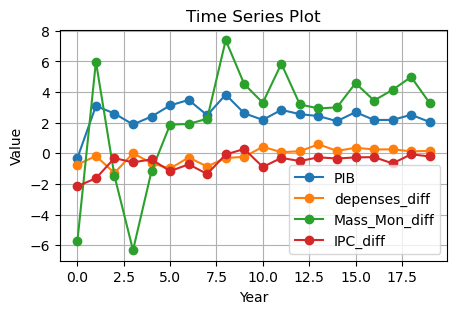

In [157]:
plt.figure(figsize=(5, 3))
for column in forc.columns:
    plt.plot(forc.index, forc[column], marker='o', label=column)

plt.title('Time Series Plot')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [158]:
test_rmse = rmse(df_test, test_pred)

In [161]:
test_rmse

array([ 6.67462882,  5.86640774, 13.58467749,  2.92890357])

In [162]:
# Calculate absolute error
absolute_error = abs(df_test.values - test_pred)

# Calculate absolute percentage error
absolute_percentage_error = absolute_error / df_test.values * 100

# Calculate mean of absolute percentage errors
mape = absolute_percentage_error.mean()

print("MAPE for test set:", mape)


MAPE for test set: 25.09414585104277
